In [1]:
# Citibike 2019 project, analyzing 2018 date of service trip data
# Author: George Chan, Sean Guo

In [2]:
# Import library and modules
import pandas as pd
import glob
import numpy as np
import os
from datetime import timedelta
import matplotlib
import pickle

# Future use
# https://markhneedham.com/blog/2018/09/18/matplotlib-remove-axis-legend/

In [3]:
# Define where are the citibke 2018 zipfiles
data_folder = r'./Data/'
print('The data are stored in: ' + data_folder)

The data are stored in: ./Data/


In [4]:
# Check what are the files in that folder
for folderName, subfolders, filenames in os.walk(data_folder):
    print('Here are the list of csv zip files you have downloaded.\n')
    print(folderName)
    
    number_of_csv_file = 0 # Total count of files read
    all_files = []         # List of file path string
    
    # Reference 01: How to get index within for loop?
    # Reference 02: How to pad number with leading zeros?
    for filename in filenames:
        
        # If and only if they are csv files
        if filename.endswith('.csv'):
            number_of_csv_file += 1
            
            # Print to terminal to show user what files is found
            print('\t' + str(number_of_csv_file).zfill(2) + ': ' + filename)
            all_files.append(data_folder + filename)
            
    # all_files = all_files.sort()
            
    # Warning message if you forgot to download all 12 months.
    # For our project we want exactly 12 file
    if number_of_csv_file != 12:
        print('Sorry, I think you are missing some files?')
        
        # Attempt to safely exit the program
        raise SystemExit

Here are the list of csv zip files you have downloaded.

./Data/
	01: 201809-citibike-tripdata.csv
	02: 201801-citibike-tripdata.csv
	03: 201803-citibike-tripdata.csv
	04: 201805-citibike-tripdata.csv
	05: 201807-citibike-tripdata.csv
	06: 201811-citibike-tripdata.csv
	07: 201808-citibike-tripdata.csv
	08: 201802-citibike-tripdata.csv
	09: 201812-citibike-tripdata.csv
	10: 201804-citibike-tripdata.csv
	11: 201810-citibike-tripdata.csv
	12: 201806-citibike-tripdata.csv


In [5]:
# Creating a list of all CSV file in the path directory
# all_files = glob.glob(data_folder + "/*.csv")

# tempCitibike list that store the file data frame
tempCitibike = []

# Track how many records total
totalRecordCount = 0

pickle_storage = 'dummy.pkl'

# If the file was properly loaded last time, re-use that dataframe
if (os.path.exists(pickle_storage)):
    citibike = pd.read_pickle(pickle_storage)

# Otherwise Load it from scratch
else:
    # Loop and append the dataframes into tempCitibke List
    for filename in sorted(all_files):
        # Filename is the path/file.ext
        print(os.path.basename(filename), end=" ")

        # df contains the entire dataset (CSV)
        df = pd.read_csv(filename) 

        # How to filter by values
        # https://stackoverflow.com/q/17071871

        # Experiment to see if only using annual membership will show a different
        # df = df.loc[df['usertype'] == 'Subscriber']

        # Because my laptop is too slow .... :P
        # Radnomly select 10% of the data, with random_state = 1
        df = df.sample(frac = 0.1, replace = True, random_state = 1)

        # Output the (rowCount, columnCount) to terminal
        print("size: " + str(df.shape))

        totalRecordCount += df.shape[0]
        tempCitibike.append(df)

    # Combine the tempCitibike dfs together
    citibike = pd.concat(tempCitibike)
    print("\nThere are " + "{:,}".format(totalRecordCount) + " number of records.")
    print("Before dropping NaN: " + "{:,}".format(citibike.shape[0]))

    # Drop rows with any (missing) variables
    # Improve performance by not using inplace option
    # Reference: https://stackoverflow.com/q/22532302
    citibike = citibike.dropna()

    print("After dropping NaN:  " + "{:,}".format(citibike.shape[0]))
    
    # Store the citibike dataframe into a pickle object for future reference
    # This can save time from re-running the entire 17M records.
    # citibike.to_pickle('citibike2018.pkl')

201801-citibike-tripdata.csv size: (71899, 15)
201802-citibike-tripdata.csv size: (84311, 15)
201803-citibike-tripdata.csv size: (97667, 15)
201804-citibike-tripdata.csv size: (130754, 15)
201805-citibike-tripdata.csv size: (182471, 15)
201806-citibike-tripdata.csv size: (195310, 15)
201807-citibike-tripdata.csv size: (191362, 15)
201808-citibike-tripdata.csv size: (197718, 15)
201809-citibike-tripdata.csv size: (187788, 15)
201810-citibike-tripdata.csv size: (187866, 15)
201811-citibike-tripdata.csv size: (126036, 15)
201812-citibike-tripdata.csv size: (101650, 15)

There are 1,754,832 number of records.
Before dropping NaN: 1,754,832
After dropping NaN:  1,754,557


In [6]:
# Example 01. How to sample the data using head(n)?
# You can put the number of row n you want to see as parameter
citibike.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
128037,830,2018-01-28 11:56:43.3930,2018-01-28 12:10:33.6090,326.0,E 11 St & 1 Ave,40.729538,-73.984267,238.0,Bank St & Washington St,40.736197,-74.008592,21256,Subscriber,1958,2
491755,126,2018-01-18 09:31:57.5380,2018-01-18 09:34:04.3190,3113.0,Greenpoint Ave & Manhattan Ave,40.730260,-73.953940,3112.0,Milton St & Franklin St,40.729060,-73.957790,33220,Subscriber,1989,1
470924,653,2018-01-05 18:10:32.9340,2018-01-05 18:21:26.2660,3063.0,Nostrand Ave & Myrtle Ave,40.695270,-73.952381,3075.0,Division Ave & Marcy Ave,40.707087,-73.957968,18633,Subscriber,1979,1
491263,821,2018-01-28 16:33:27.7050,2018-01-28 16:47:08.8110,3112.0,Milton St & Franklin St,40.729060,-73.957790,3078.0,Broadway & Roebling St,40.709248,-73.960631,18473,Subscriber,1985,1
371403,559,2018-01-02 19:23:00.5350,2018-01-02 19:32:20.0530,503.0,E 20 St & Park Ave,40.738274,-73.987520,254.0,W 11 St & 6 Ave,40.735324,-73.998004,30669,Subscriber,1952,2


In [7]:
# Example 02. Group by start station name and frequency count
start_count = citibike.groupby('start station name').size()
start_count.head(3)

start station name
1 Ave & E 110 St    1023
1 Ave & E 16 St     6684
1 Ave & E 18 St     4760
dtype: int64

In [8]:
# Example 02B. Sort it and show the top 10
start_count.sort_values(axis=0, ascending=False)[0:10]

start station name
Pershing Square North    14856
E 17 St & Broadway       10862
Broadway & E 22 St       10834
W 21 St & 6 Ave          10726
Broadway & E 14 St        9487
West St & Chambers St     9447
W 41 St & 8 Ave           8699
Broadway & W 60 St        8468
8 Ave & W 33 St           8449
12 Ave & W 40 St          8347
dtype: int64

In [9]:
# Example 03. Iterate through the grouped by object
# Getting a very small piece
small_citibike = citibike.iloc[0:100, :]

# This group the records by start station and all the trips associated
ind = 0
for name, group in small_citibike.groupby('start station name'):
    print(name)
    #print(group)
    if ind < 2:
        ind += 1
    else:
        break

1 Ave & E 30 St
1 Ave & E 62 St
1 Ave & E 68 St


In [10]:
# Example 03B. Let's group by multiple keys (start and end station)
ind = 0
for (start, end), group in small_citibike.groupby(['start station name', 'end station name']):
    print((start, end))
    # print(group)
    if ind < 2:
        ind += 1
    else:
        break

('1 Ave & E 30 St', 'W 31 St & 7 Ave')
('1 Ave & E 62 St', 'W 33 St & 7 Ave')
('1 Ave & E 68 St', 'Pleasant Ave & E 116 St')


In [11]:
# Example 04. Get the mean (average) duration of the trips in seconds
average_trip_length = citibike['tripduration'].mean() / 60
print('Average Trip in minutes:', round(average_trip_length))

Average Trip in minutes: 17


In [12]:
# Example 04B. Get the count of trips by year of birth
year_of_birth_trip_size = citibike.groupby('birth year').size()
year_of_birth_trip_size.head(5)

birth year
1885     31
1886     38
1887     85
1888    107
1889     10
dtype: int64

In [13]:
# We see a huge spike for random numbers
year_of_birth_trip_size.plot(kind='bar')

Adjusted birth year and trip line graph, it looks much better!


(1940, 2002)

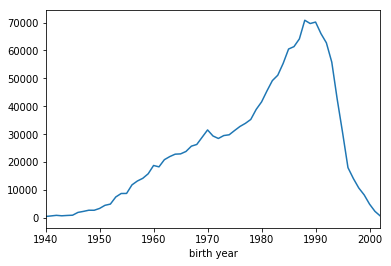

In [14]:
# Let's exclude 55 since we know it's a dummy value
# year_of_birth_trip_size = citibike[citibike['birth year' != 1969]].groupby('birth year').size()
# year_of_birth_trip_size.sort_values()
# year_of_birth_trip_size.head(5)

print('Adjusted birth year and trip line graph, it looks much better!')
not_55_filter = citibike['birth year'] != 1969
year_of_birth_trip_size = citibike[not_55_filter].groupby('birth year').size()
ax = year_of_birth_trip_size.plot()
ax.set_xlim(1940, 2002)

In [15]:
# Example 05. Group by mapping (Gender) dictionary
gender_map = {
    0: 'Unknown',
    1: 'Male',
    2: 'Female'
}

gender_series = citibike.groupby(['gender']).size()
gender_series

gender
0     148466
1    1197157
2     408934
dtype: int64

In [16]:
# Example 06. (P.303)
station_grouped = citibike.groupby('start station name')

# How many trips started at such location?
station_grouped['start station name'].count()[:5]

start station name
1 Ave & E 110 St    1023
1 Ave & E 16 St     6684
1 Ave & E 18 St     4760
1 Ave & E 30 St     4167
1 Ave & E 44 St     2941
Name: start station name, dtype: int64

In [17]:
# Example 07. (P.304)
# Please use an aggerate function by pass the name
# of the function as string.

# Create a groupby object 
grouped = citibike.groupby('start station name')

# Number of non-NA value in the group
# Getting only 1 column
grouped_station = grouped['bikeid']

# Showing the first 5
grouped_station.agg('count').sort_values(ascending=False)[:5]

start station name
Pershing Square North    14856
E 17 St & Broadway       10862
Broadway & E 22 St       10834
W 21 St & 6 Ave          10726
Broadway & E 14 St        9487
Name: bikeid, dtype: int64

In [18]:
# Example 08. (P.305)
# Passing a 2 elemtn tuple to map the function name
# (name, function)
grouped_station.agg([('count_of_rides', 'count')])[:5]

,count_of_rides
start station name,
1 Ave & E 110 St,1023
1 Ave & E 16 St,6684
1 Ave & E 18 St,4760
1 Ave & E 30 St,4167
1 Ave & E 44 St,2941


In [19]:
# Example 09. (P.306)
# Using a list of functions

# This will show the count of trips, average duration
# and the longest duration.
function = ['count', 'mean', 'max']
result = grouped['tripduration'].agg(function)
result.sample(5)

,count,mean,max
start station name,,,
W 52 St & 11 Ave,3803,1008.535367,31840
Broadway & W 41 St,6680,732.701647,55026
Court St & Nelson St,753,2697.205843,1446410
W 64 St & West End Ave,1280,868.054688,16443
Dean St & Hoyt St,1005,857.261692,62707


In [20]:
# Example 10. (P.306)
# How to use a dictionary to apply multiple functions
# on a given column
result = grouped.agg({'birth year': ['min', 'max'], 
                      'tripduration': ['min', 'max', 'count', 'std']})

result.sample(5)

birth year       tripduration               \
                               min   max          min    max count   
start station name                                                   
Dwight St & Van Dyke St       1942  2000           80  21133   273   
Wyckoff St & Bond St          1900  1990          239    373     5   
Bus Slip & State St           1901  2001           63  94115  2427   
E 25 St & 2 Ave               1900  2002           62  13956  5334   
E 71 St & 2 Ave               1944  2001           62   7112   647   

                                      
                                 std  
start station name                    
Dwight St & Van Dyke St  1474.401833  
Wyckoff St & Bond St       52.050937  
Bus Slip & State St      2315.264897  
E 25 St & 2 Ave           625.854906  
E 71 St & 2 Ave           660.338100

In [21]:
# Example 11
# Return the aggregated data without row indexes
result = citibike.groupby(['tripduration', 'starttime'], 
                          as_index=False).median()
result.head()

,tripduration,starttime,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
0,61,2018-01-13 10:41:51.6110,238.0,40.736197,-74.008592,238.0,40.736197,-74.008592,31562,1986,2
1,61,2018-01-17 08:23:23.3220,3338.0,40.786259,-73.945526,3318.0,40.783964,-73.947167,26675,1990,2
2,61,2018-01-20 13:24:14.1930,525.0,40.755942,-74.002116,525.0,40.755942,-74.002116,24980,1991,1
3,61,2018-01-20 16:21:16.1590,3224.0,40.739974,-74.005139,3224.0,40.739974,-74.005139,20183,1969,0
4,61,2018-01-23 20:28:39.7190,358.0,40.732916,-74.007114,127.0,40.731724,-74.006744,30280,1976,1


In [22]:
# Example 12. (P.308)
# Write a function that picks the top 5 longest tripduration
# These bikes took a 2 months + trip...

def top(df, n=5, column='tripduration'):
    return df.sort_values(by=column)[-n:]

top(citibike, n=6)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1131826,5183041,2018-05-13 17:11:51.8430,2018-07-12 16:55:53.2520,3042.0,Fulton St & Utica Ave,40.679427,-73.929891,3060.0,Willoughby Ave & Tompkins Ave,40.694254,-73.946269,28035,Customer,1982,1
1432974,5661342,2018-06-26 22:13:18.9560,2018-08-31 10:49:01.4280,3177.0,W 84 St & Broadway,40.786795,-73.977112,3531.0,Frederick Douglass Blvd & W 129 St,40.812551,-73.949229,31238,Customer,1988,1
1593575,6139206,2018-06-26 13:31:15.8970,2018-09-05 14:51:22.8480,3345.0,Madison Ave & E 99 St,40.789485,-73.952429,3245.0,NYCBS DEPOT - DELANCEY,40.716444,-73.982331,15411,Customer,1969,0
1593575,6139206,2018-06-26 13:31:15.8970,2018-09-05 14:51:22.8480,3345.0,Madison Ave & E 99 St,40.789485,-73.952429,3245.0,NYCBS DEPOT - DELANCEY,40.716444,-73.982331,15411,Customer,1969,0
1593575,6139206,2018-06-26 13:31:15.8970,2018-09-05 14:51:22.8480,3345.0,Madison Ave & E 99 St,40.789485,-73.952429,3245.0,NYCBS DEPOT - DELANCEY,40.716444,-73.982331,15411,Customer,1969,0
231491,9452933,2018-03-31 04:46:48.6780,2018-07-18 14:35:41.8620,362.0,Broadway & W 37 St,40.751726,-73.987535,3245.0,NYCBS DEPOT - DELANCEY,40.716444,-73.982331,19422,Customer,1969,0


In [31]:
# Experiement with Plotly
import plotly.express as px

In [32]:
px.set_mapbox_access_token(open('token.txt').read())

In [33]:
carshare = px.data.carshare()

In [34]:
# This is a major break through!!
fig = px.scatter_mapbox(carshare, lat='centroid_lat',
                        lon='centroid_lon', color='peak_hour',
                        size='car_hours',
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15, zoom=10)
fig.show()

In [35]:
# https://stackoverflow.com/a/22341390
# citibike['start station name'].tolist()

stations = citibike[['start station name', 
                     'start station latitude',
                     'start station longitude']].drop_duplicates(keep='first')

stations.head(5)

,start station name,start station latitude,start station longitude
128037,E 11 St & 1 Ave,40.729538,-73.984267
491755,Greenpoint Ave & Manhattan Ave,40.730260,-73.953940
470924,Nostrand Ave & Myrtle Ave,40.695270,-73.952381
491263,Milton St & Franklin St,40.729060,-73.957790
371403,E 20 St & Park Ave,40.738274,-73.987520


In [36]:
# Try to use a simplier way, it worked! :)
fig = px.scatter_mapbox(stations, 
                        lat='start station latitude',
                        lon='start station longitude',
                        size_max=15, 
                        zoom=10)
fig.show()

In [38]:
# Now at this wonder time, let's try to map the citibike
# station using plotly and mapbox 
import plotly.graph_objects as go

mapbox_access_token = open('token.txt').read()

fig = go.Figure(go.Scattermapbox(
        lat=stations['start station latitude'].tolist(),
        lon=stations['start station longitude'].tolist(),
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=5
        ),
        text=stations['start station name'].tolist(),
    ))

fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            # 40.729538	-73.984267
            lat=40.729538,
            lon=-73.984267
        ),
        pitch=0,
        zoom=10
    ),
)

fig.show()